In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

user_data = pd.read_csv("all_user_data_c_50_95.csv")

In [2]:
user_data.drop(user_data.columns[[0]], axis=1, inplace=True)
user_data.head()

,id,name,editcount,status
0,15,!!,1,1
1,228,!dea4u,1,1
2,387,"""Country"" Bushrod Washington",1652,0
3,582,"""Yahia""",1023,0
4,829,$1LENCE D00600D,18642,0


In [3]:
user_data = user_data[user_data['status']>0]
user_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,id,editcount,status
count,2885,2885,2885
mean,3.12261e+06,1,1
std,1.56652e+06,0,0
min,15,1,1
25%,1.85180e+06,1,1
50%,3.24545e+06,1,1
75%,4.39629e+06,1,1
max,5.80923e+06,1,1


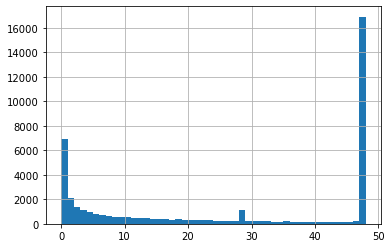

In [11]:

import os.path
import numpy as np
from trust_score import TrustScore
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import json

y_pred = []
y_test=[]
cou = 0
longevity = []

for row in user_data.iterrows():
    path = 'user_data_50_95/rev_list_' + str(row[1]['id']) + '-d.json'
    #print(path)
    try:
        with open(path, 'r') as infile:
            data = json.loads(infile.read())
            if len(data) > 0:
                for d in data:
                    del d['next_rev']
                
                #print(path)

                graph_for = "longevityRev"

                series = pd.DataFrame(data=data)
                series = series[['pageid', 'timestamp', 'small_text', graph_for]]
                series = series[series.longevityRev >= 0]
                if len(series) > 9:
                    #print('User ID: ', str(row[1]['id']))
                    #print(series['small_text'])
                    longevity.extend(series['longevityRev'].values.tolist())
                    #print(longevity)
    except Exception as e:
#         print('error :')
        1+1
longevity_list = pd.DataFrame({'longevityRev':longevity})
longevity_list.head()
#longevity_list.apply(pd.value_counts).to_csv("all_user_longevity.csv")
longevity_list['longevityRev'].hist(bins=48)
#longevity_list.apply(pd.value_counts).plot()